In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plty
import numpy as np
import pandas as pd

In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
#we have 3-dimnesional images with :
#5000-->traing 
#1000-->testing

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train = y_train.flatten()
# u may use reshape(-1) to make it 1d array

In [16]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] 

In [18]:
#plotting some of our images

In [22]:
def plot_picture(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

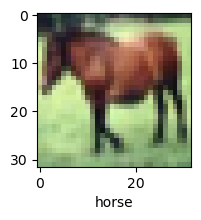

In [24]:
plot_picture(X_train,y_train,7)

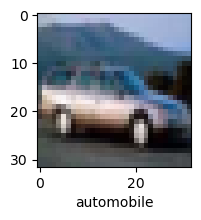

In [25]:
plot_picture(X_train,y_train,4)

In [27]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range,
#we need to divide it by 255

In [28]:
#normalizing data

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
#ANN

In [31]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\K KIRAN KUMAR\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.3037 - loss: 1.9340
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4195 - loss: 1.6488
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4508 - loss: 1.5552
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4724 - loss: 1.4832
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4946 - loss: 1.4317


In [32]:
#You can see that at the end of 5 epochs, accuracy is at around 49%

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.52      0.55      1000
           1       0.69      0.52      0.59      1000
           2       0.39      0.36      0.38      1000
           3       0.38      0.32      0.35      1000
           4       0.43      0.38      0.41      1000
           5       0.41      0.38      0.39      1000
           6       0.49      0.60      0.54      1000
           7       0.43      0.69      0.53      1000
           8       0.57      0.67      0.61      1000
           9       0.63      0.47      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [33]:
#building CNN 

In [37]:
cnn = models.Sequential([
    #cnn part
    layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters = 64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #dense part
      layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    
    
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3836 - loss: 1.6990
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5970 - loss: 1.1486
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6564 - loss: 0.9898
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6904 - loss: 0.8967
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7175 - loss: 0.8174
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7389 - loss: 0.7546
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7568 - loss: 0.7031
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7666 - loss: 0.6711
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7846 - loss: 0.6226
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7934 - loss: 0.5903


In [39]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7074 - loss: 0.9059


[0.9172808527946472, 0.7027999758720398]

In [40]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[3.43159685e-04, 8.83465458e-04, 3.92874179e-04, 7.73318708e-01,
        4.48871317e-04, 2.05768824e-01, 1.50729045e-02, 2.78708940e-05,
        3.67444381e-03, 6.88913351e-05],
       [6.79393823e-04, 2.29536667e-02, 4.97805695e-06, 1.72290027e-06,
        1.86151059e-08, 2.01977972e-08, 2.78091949e-09, 8.57417159e-09,
        9.75063860e-01, 1.29632454e-03],
       [4.10856791e-02, 3.92906755e-01, 1.51228753e-03, 1.03184693e-02,
        2.02576790e-04, 1.46358497e-02, 1.31885812e-03, 3.56856594e-03,
        1.51503891e-01, 3.82946968e-01],
       [8.90132129e-01, 8.57770294e-02, 2.10505840e-03, 1.75266201e-03,
        2.23923172e-03, 3.13834869e-04, 1.47491414e-03, 9.35940625e-05,
        1.58269070e-02, 2.84568319e-04],
       [1.05401477e-06, 1.29783039e-05, 1.81656741e-02, 2.59379204e-02,
        2.91058570e-02, 2.60064029e-03, 9.24170852e-01, 8.66353446e-07,
        3.80105735e-06, 3.75125467e-07]], dtype=float32)

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

TypeError: only integer scalar arrays can be converted to a scalar index

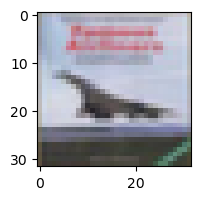

In [44]:
plot_picture(X_test,y_test,3)

In [45]:
classes[y_classes[3]]

'airplane'